In [93]:
import pandas as pd
import numpy as np
from IPython.core.display import display
import matplotlib.pyplot as plt

from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *


#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


In [94]:
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

np.unique(data[len(data.columns)-1])

452 rows and 280 columns


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16])

In [95]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data.groupby(['arrhythmia']).size()

arrhythmia
0    245
1    207
dtype: int64

In [96]:
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
data.head(3)

452 rows and 276 columns


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8,1
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10,1


In [97]:
X = data.iloc[:, :-2]  # The first to third-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label

print(X.head(3))
print(y.head(3))
print(np.unique(y))

   0    1    2    3    4    5    6    7    8    9    ...   269  270  271  272  \
0   75    0  190   80   91  193  371  174  121  -16  ...  -0.3  0.0  9.0 -0.9   
1   56    1  165   64   81  174  401  149   39   25  ...  -0.5  0.0  8.5  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...   0.9  0.0  9.5 -2.4   

   273  274  275  276   277   278  
0  0.0  0.0  0.9  2.9  23.3  49.4  
1  0.0  0.0  0.2  2.1  20.4  38.8  
2  0.0  0.0  0.3  3.4  12.3  49.0  

[3 rows x 274 columns]
0    1
1    1
2    1
Name: arrhythmia, dtype: int64
[0 1]


In [122]:
# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20171012)

In [123]:
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [124]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [128]:
from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler

fig = plt.figure(figsize=(8,8))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

probas = lr.predict_proba(X_test_std)

fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)

In [129]:
from sklearn.metrics import auc

print('AUC: %.2f' % auc(fpr, tpr))

AUC: 0.70


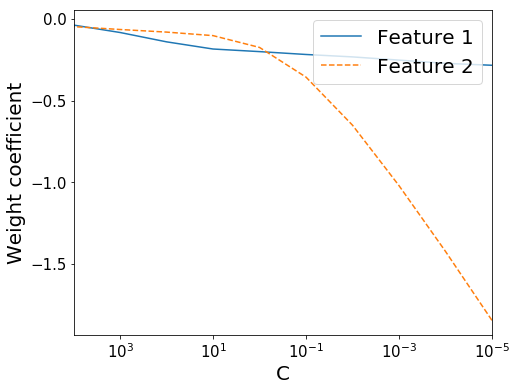

In [130]:
weights, params = [], []
for c in np.arange(-5, 5, dtype='float32'):
  lr = LogisticRegression(C=0.3**c, random_state=0)
  lr.fit(X_train_std, y_train)
  # get the coefficients of w
  weights.append(lr.coef_[0])
  params.append(10**c)

fig, ax = plt.subplots(figsize=(8,6))
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Feature 1')
plt.plot(params, weights[:, 1],
         label='Feature 2', linestyle='--')
plt.xlim(10**4, 10**-5)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Weight coefficient')
plt.legend(loc='lower left')
plt.tight_layout()
plt.legend(loc=1, prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/lab06_105062620_fig-logistic-regression-c.png', dpi=300)
plt.show()

regularized AUC: 0.80


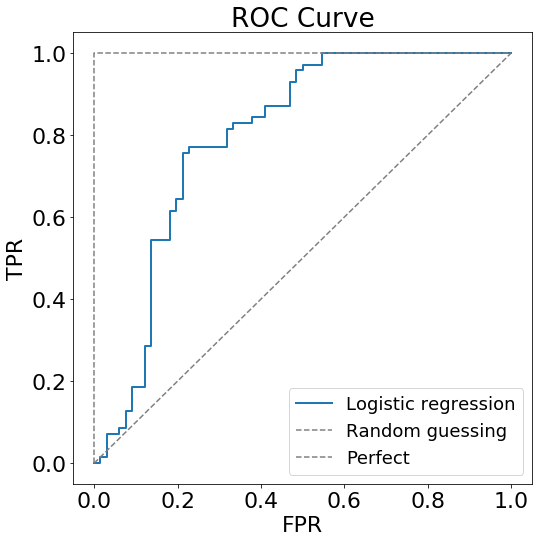

In [155]:
rmean_tpr = 0.0
rmean_fpr = np.linspace(0, 1, 100)
all_tpr = []

rprobas = lr.predict_proba(X_test_std)

rfpr, rtpr, rthresholds = roc_curve(y_test,
                                 rprobas[:, 0],
                                 pos_label=0)

from sklearn.metrics import auc

print('regularized AUC: %.2f' % auc(rfpr, rtpr))

fig = plt.figure(figsize=(8,8))

plt.plot(rfpr, rtpr, lw=2,
         label='Logistic regression')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='--',
         color='gray',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.legend(loc=4, prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/Lab06_105062620-roc.png', dpi=300)
plt.show()

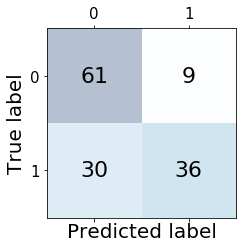

In [152]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/Lab06_105062620-confusion.png', dpi=300)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Class labels: %s' % np.unique(y))

# metrics
print('[Precision]')
p = precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f' % (p[0], p[1]))
p = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % p)
p = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % p)

print('\n[Recall]')
r = recall_score(y_true=y_test, y_pred=y_pred,average=None)
print('Individual: %.2f, %.2f' % (r[0], r[1]))
r = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % r)
r = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % r)

print('\n[F1-score]')
f = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f' % (f[0], f[1]))
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % f)
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % f)

Class labels: [0 1]
[Precision]
Individual: 0.67, 0.80
Micro: 0.71
Macro: 0.74

[Recall]
Individual: 0.87, 0.55
Micro: 0.71
Macro: 0.71

[F1-score]
Individual: 0.76, 0.65
Micro: 0.71
Macro: 0.70


In [154]:
We can see that the macro average score is higher than micro one. 
It is seems to me that the metric takes into account the class size.
It shows that the weights fo all classes are almost same.
The first and second class contribute eqaully to the final score.

SyntaxError: invalid syntax (<ipython-input-154-fa26fbc13dd5>, line 1)